In [1]:
from google.colab import drive
import zipfile
import os

drive.mount('/content/drive')

zip_file_path = '/content/drive/My Drive/archive (6).zip'
destination_folder = '/content/coffee_bean'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

print(f"Extracted files to: {destination_folder}")


Mounted at /content/drive
Extracted files to: /content/coffee_bean


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms,datasets
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_dir='/content/coffee_bean/train'
test_dir='/content/coffee_bean/test'

In [4]:
train_transform=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])
test_transform=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

In [5]:
train_dataset=datasets.ImageFolder(root=train_dir,transform=train_transform)
test_dataset=datasets.ImageFolder(root=test_dir,transform=test_transform)

In [6]:
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False)

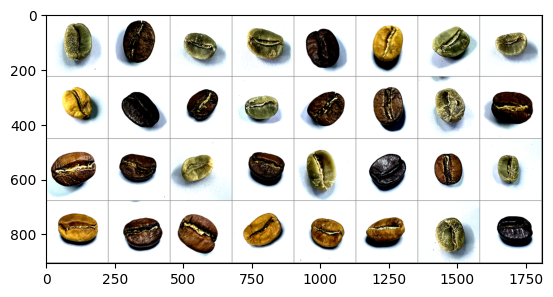

Green Medium Green Green Dark  Light Green Green Light Dark  Medium Green Medium Medium Green Medium Medium Medium Green Medium Green Dark  Medium Green Light Medium Medium Light Light Light Green Dark 


In [8]:
def imshow(img):
  img=img/2+0.5
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

dataiter=iter(train_loader)
images,labels=next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{train_dataset.classes[labels[j]]:5}' for j in range(32)))

In [9]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [12]:
class CustomCnn(nn.Module):
  def __init__(self):
    super(CustomCnn,self).__init__()
    self.conv1=nn.Conv2d(3,32,kernel_size=3,padding=1)
    self.conv2=nn.Conv2d(32,64,kernel_size=3,padding=1)
    self.conv3=nn.Conv2d(64,128,kernel_size=3,padding=1)
    self.pool=nn.MaxPool2d(2,2)
    self.fc1=nn.Linear(128*28*28,512)
    self.fc2=nn.Linear(512,256)
    self.fc3=nn.Linear(256,4)

  def forward(self,x):
    x=self.pool(torch.relu(self.conv1(x)))
    x=self.pool(torch.relu(self.conv2(x)))
    x=self.pool(torch.relu(self.conv3(x)))
    x=x.view(-1,128*28*28)
    x=torch.relu(self.fc1(x))
    x=torch.relu(self.fc2(x))
    x=self.fc3(x)
    return x


model=CustomCnn().to(device)

In [14]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [18]:
num_epochs=10
for epoch in range(num_epochs):
  model.train()
  running_loss=0.0
  total=0
  correct=0
  for images,labels in train_loader:
    images=images.to(device)
    labels=labels.to(device)
    optimizer.zero_grad()
    outputs=model(images)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
    _,predicted=torch.max(outputs,1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()

  train_loss=running_loss/len(train_loader)
  train_accuracy=100*correct/total
  print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%')

Epoch [1/10], Loss: 0.0482, Accuracy: 98.42%
Epoch [2/10], Loss: 0.0730, Accuracy: 97.42%
Epoch [3/10], Loss: 0.0456, Accuracy: 98.50%
Epoch [4/10], Loss: 0.0598, Accuracy: 97.92%
Epoch [5/10], Loss: 0.0402, Accuracy: 98.17%
Epoch [6/10], Loss: 0.0188, Accuracy: 99.00%
Epoch [7/10], Loss: 0.0229, Accuracy: 99.42%
Epoch [8/10], Loss: 0.0069, Accuracy: 99.83%
Epoch [9/10], Loss: 0.0180, Accuracy: 99.25%
Epoch [10/10], Loss: 0.0056, Accuracy: 99.83%


In [20]:
model.eval()
test_total=0
test_correct=0
with torch.no_grad():
  for images,labels in test_loader:
    images=images.to(device)
    labels=labels.to(device)
    outputs=model(images)
    _,predicted=torch.max(outputs,1)
    test_total+=labels.size(0)
    test_correct+=(predicted==labels).sum().item()

  test_accuracy=100*test_correct/test_total
  print(f'Test Accuracy: {test_accuracy:.2f}%')

Test Accuracy: 100.00%
